<a href="https://colab.research.google.com/github/TadieB/pytorch-collab/blob/main/DeepCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import os
import torch
import torchvision
import tarfile

from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

# Downloading the Dataset from url

+ png format images from fast.ai page

In [10]:
# download dataset
dataset_url = 'https://files.fast.ai/data/examples/cifar10.tgz'
download_url(dataset_url,'cifa10')

100%|██████████| 168168549/168168549 [00:01<00:00, 115917028.45it/s]


+ The extracted dataset is saved to the directory data/cifar10
+ cifar10 contains two folders: train, test
+ Each of them contains 10 foldes, one for each class of images.

# Extracting the .tgz Dataset

In [11]:
# Extract from archive
with tarfile.open('./cifa10/cifar10.tgz','r:gz') as tar:
  tar.extractall(path='./data')

# Exploring the Dataset & Directory

In [13]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/train')
print(classes)

['test', 'labels.txt', 'train']
['truck', 'cat', 'automobile', 'horse', 'ship', 'dog', 'deer', 'bird', 'frog', 'airplane']


In [14]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print("No. of training examples for airplanes:", len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['17115_airplane.png', '16965_airplane.png', '25330_airplane.png', '25746_airplane.png', '25616_airplane.png']


In [15]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of training examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of training examples for ship: 1000
['1075_ship.png', '6684_ship.png', '1471_ship.png', '404_ship.png', '1205_ship.png']


+ the above folder /directory/ structure (one for each class) is common in computer vision
+ DL libraries povide utilities for working with such datasets.
+ use ImageFolder class from torchvision to load the data as pytorch tensors.

# Visualize the Training Set

In [16]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [17]:
dataset = ImageFolder(data_dir + '/train', transform = ToTensor())

In [26]:
dataset[0]

(tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
          [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
          [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
          ...,
          [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
          [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
          [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],
 
         [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
          [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
          [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
          ...,
          [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
          [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
          [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],
 
         [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
          [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.9529, 0.9490],
          [0.9686, 0.9686, 0.9765,  ...,

In [18]:
data_dir

'./data/cifar10'

+ each element from the training set is a tuple containing an image tensor and a label
(imagetensor, label)

In [19]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         ...,
         [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
         [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
         [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],

        [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
         [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
         [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
         ...,
         [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
         [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
         [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],

        [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
         [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.9529, 0.9490],
         [0.9686, 0.9686, 0.9765,  ..., 0.9569, 0.9529, 0.

In [20]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [22]:
f = open("./data/cifar10/labels.txt", "r")
print(f.read())

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck



+ Changing the Tenso Dimensions to (32,32,3)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_example(img, label):
  print('Label: ', dataset.classes[label],"("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

+ The permute(1, 2, 0) operation swaps the dimensions in such a way that the tensor is rearranged to (H, W, C).

+ C = no. of channels , H = height, W = weight

Label:  airplane (0)


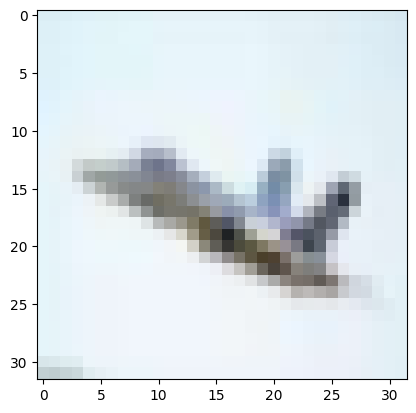

In [36]:
img, label = dataset[0]
show_example(img, label)

Label:  bird (2)


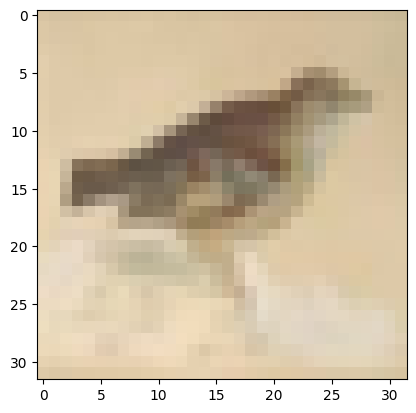

In [38]:
show_example(*dataset[10099])

# Training and Validation Datasets

+ Training set - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.

+ Validation set - used to evaluate the model while training, adjust hypepaameters (learning rate, reg, etc) and pick the best vesion of the model.

+ Test set - used to compare diffeent models, or different types of modeling approaches, and report the final accuracy of the model.

In [42]:
random_seed = 42
torch.manual_seed(random_seed)
# Using the same seed ensures that random operations,
# like initializing weights or shuffling data,
# will produce the same results each time the code is run.

In [41]:
val_size = 5000
train_size = len(dataset)-val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [43]:
from torch.utils.data.dataloader import DataLoader

batch_size = 128

+ Our suggested max number of worker in current system is 2,

In [49]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(train_ds, batch_size*2, num_workers=2,pin_memory=True)

+ Use make_grid to look at batches of images from the dataset.

In [50]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_xticks([]);
    ax.set_yticks([]);
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

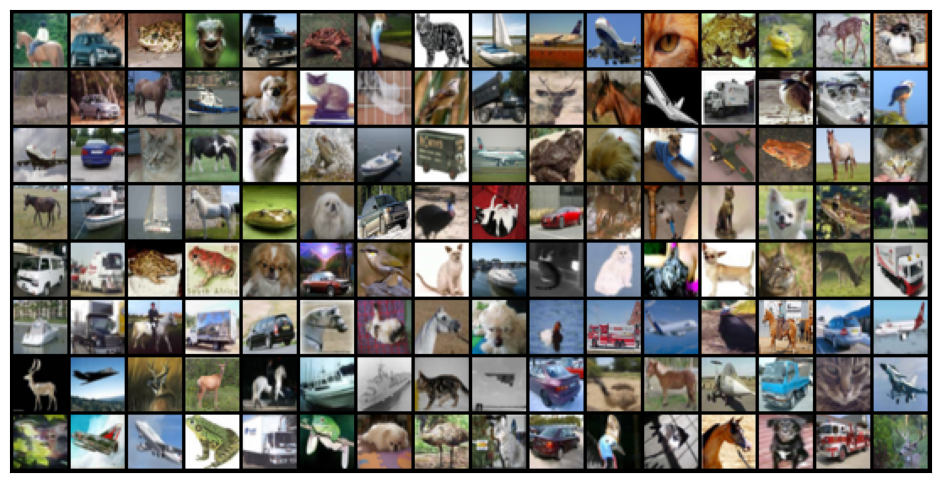

In [51]:
show_batch(train_dl)

# CNN

In [52]:
def apply_kernel(image, kernel):
  ri,ci = image.shape
  rk,ck = kernel.shape
  ro,co = ri-rk+1, ci-ck+1 # output dimention, kernel*image
  output = torch.zeros([ro,co])
  for i in range(ro):
    for j in range(co):
      output[i,j] = torch.sum(image[i:i+rk,j:j+ck]*kernel)
  return output

In [53]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0],
    [0, 0, 1, 3, 1],
    [3, 1, 2, 2, 3],
    [2, 0, 0, 2, 2],
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2],
    [2, 2, 0],
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [56]:
import torch.nn as nn
import torch.nn.functional as F

In [60]:
simple_model = nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1, padding=1),
    nn.MaxPool2d(2,2)
)
# 3 the number of input channels
# 8 the number of filters which produces 8 channels
# MaxPool2d, reducing the spatial dimensions of the feature map...
#  by a factor of 2, height by 2 width by 2.
# Conv2d accepting 3 channels (RGB) input and produces 8 channels output using 8 different filters.
# kernel 3x3

In [61]:
for images, labels in train_dl:
  print('images.shape:', images.shape)
  out = simple_model(images)
  print('out.shape:', out.shape)
  break


images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # input: 3x32x32
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1), # output: 32x32x32
            nn.ReLU(),
            # input2: 32x32x32
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # output2: 64x32x32
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output3: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            # 6 convolution layers

            nn.Flatten(),
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
            # 3 linear layers
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = Cifar10CnnModel()
model

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

# Training the **Model**

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history


In [ ]:
model = to_device(Cifar10CnnModel(), device)

In [ ]:
evaluate(model, val_dl)

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [ ]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

In [ ]:
jovian.log_metrics(train_loss=history[-1]['train_loss'],
                   val_loss=history[-1]['val_loss'],
                   val_acc=history[-1]['val_acc'])

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)

# Testing

In [ ]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

In [ ]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

In [ ]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

# Saving and loading the model

In [ ]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

In [ ]:
model2 = to_device(Cifar10CnnModel(), device)

In [ ]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

In [ ]:
evaluate(model2, test_loader)

## Summary and Further Reading/Exercises

We've covered a lot of ground in this tutorial. Here's quick recap of the topics:
* Introduction to the CIFAR10 dataset for image classification
* Downloading, extracing and loading an image dataset using `torchvision`
* Show random batches of images in a grid using `torchvision.utils.make_grid`
* Creating a convolutional neural network using with `nn.Conv2d` and `nn.MaxPool2d` layers
* Capturing dataset information, metrics and hyperparameters using the `jovian` library
* Training a convolutional neural network and visualizing the losses and errors
* Understanding overfitting and the strategies for avoiding it (more on this later)
* Generating predictions on single images from the test set
* Saving and loading the model weights, and attaching them to the eperiment snaptshot using `jovian`

There's a lot of scope to experiment here, and I encourage you to use the interactive nature of Jupyter to play around with the various parameters. Here are a few ideas:
* Try chaging the hyperparameters to achieve a higher accuracy within fewer epochs. You use the comparison table on the Jovian.ml project page to compare your experiments.
* Try adding more convolutional layers, or increasing the number of channels in each convolutional layer
* Try using a feedforward neural network and see what's the maximum accuracy you can achieve
* Read about some of the startegies mentioned above for reducing overfitting and achieving better results, and try to implement them by looking into the PyTorch docs.
* Modify this notebook to train a model for a different dataset (e.g. CIFAR100 or ImageNet)

In the next tutorial, we will continue to improve our model's accuracy using techniques like data augmentation, batch normalization and dropout. We will also learn about residual networks (or ResNets), a small but critical change to the model architecture that will significantly boost the performance of our model. Stay tuned!